# Week 9: Epidemics on Networks

This tutorial will require the following packages:
* networkx
* matplotlib
* ndlib (network diffusion library)
* warnings (optional)

I should put a disclaimer here that these are all simple **toy models** of epidemics that I have made largely because I find this sort of thing very interesting, and conclusions should be taken with a big pinch of salt in the context of the current COVID-19 epidemic and measures to combat that. However, this sort of thing is actually the type of model (albeit with more complex network structures and assumptions, taking into account human mobility etc) that network scientists who work on COVID-19 are using, so I hope this is interesting for you.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import numpy as np

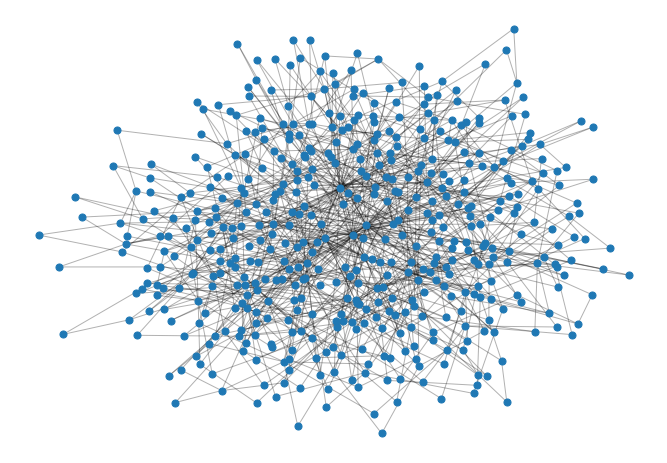

In [100]:
n = 500

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)

G = nx.barabasi_albert_graph(n, 2)

plt.axis('off')
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha = 0.3)

In [104]:
def get_SIS_infection_curve(G, infection_rate, recovery_rate, n_iter):
    
    model = ep.SISModel(G)
    no_nodes = G.number_of_nodes()
    
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', infection_rate)
    cfg.add_model_parameter('lambda', recovery_rate)
    cfg.add_model_parameter("fraction_infected", 0.05)
    model.set_initial_status(cfg)
    
    times = np.array(range(n_iter))
    
    iterations = model.iteration_bunch(n_iter)
    infected = np.array([iterations[i]['node_count'][1] for i in range(n_iter)])/no_nodes
    return times, infected

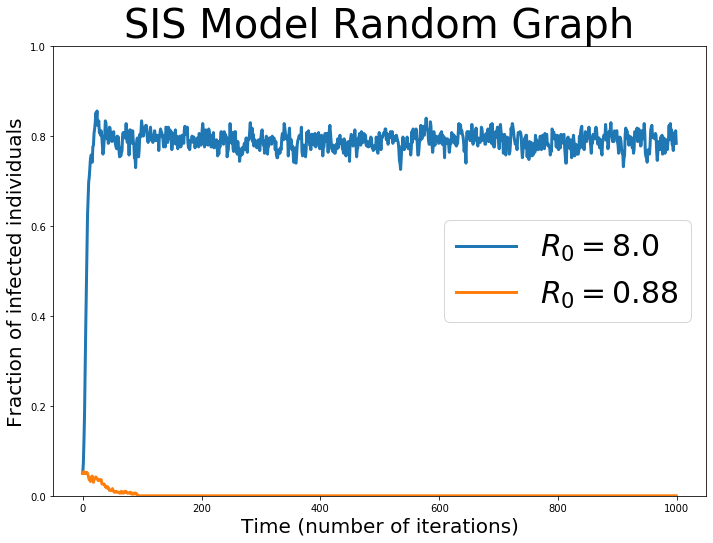

In [126]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

G = nx.erdos_renyi_graph(500,0.008)

plt.title("SIS Model Random Graph", fontsize = 40)
plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylim(0,1)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

R0 = 2.0
curve1 = get_SIS_infection_curve(G, 0.1*R0, 0.1, 1000)
ax.plot(curve1[0],curve1[1], label = '$R_0 = $'+str(R0*4), linewidth = 3)

R0 = 0.22
curve2 = get_SIS_infection_curve(G, 0.1*R0, 0.1, 1000)
ax.plot(curve2[0],curve2[1], label = '$R_0 = $'+str(R0*4), linewidth = 3)

plt.legend(loc = 'center right', fontsize=30)
plt.show()

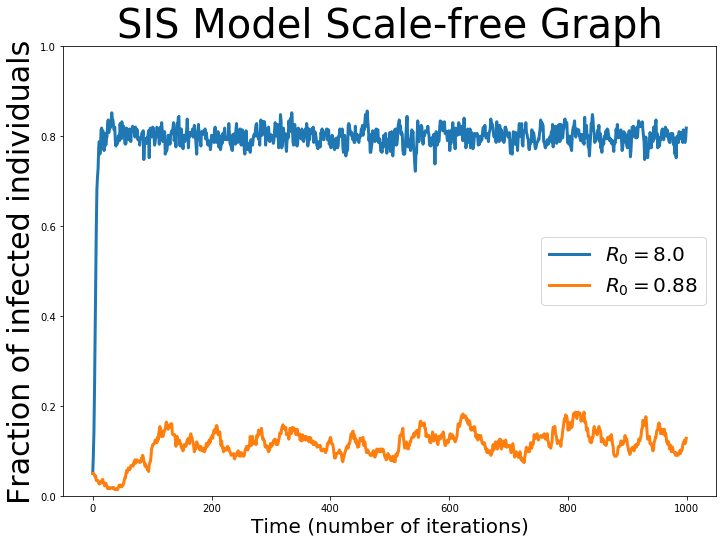

In [127]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

G = nx.barabasi_albert_graph(500,2)

plt.title("SIS Model Scale-free Graph", fontsize = 40)
plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylim(0,1)
plt.ylabel("Fraction of infected individuals", fontsize = 30)

R0 = 2.0
curve1 = get_SIS_infection_curve(G, 0.1*R0, 0.1, 1000)
ax.plot(curve1[0],curve1[1], label = '$R_0 = $'+str(R0*4), linewidth = 3)

R0 = 0.22
curve2 = get_SIS_infection_curve(G, 0.1*R0, 0.1, 1000)
ax.plot(curve2[0],curve2[1], label = '$R_0 = $'+str(R0*4), linewidth = 3)

plt.legend(loc = 'center right', fontsize=20)
plt.show()

In [136]:
def get_SIR_infection_curve(G, infection_rate, recovery_rate, n_iter):
    
    model = ep.SIRModel(G)
    no_nodes = G.number_of_nodes()
    
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', infection_rate)
    cfg.add_model_parameter('gamma', recovery_rate)
    cfg.add_model_parameter("fraction_infected", 0.05)
    model.set_initial_status(cfg)
    
    times = np.array(range(n_iter))
    
    iterations = model.iteration_bunch(n_iter)
    susceptible = np.array([iterations[i]['node_count'][0] for i in range(n_iter)])/no_nodes
    infected = np.array([iterations[i]['node_count'][1] for i in range(n_iter)])/no_nodes
    recovered = np.array([iterations[i]['node_count'][2] for i in range(n_iter)])/no_nodes
    return times, infected, recovered, susceptible

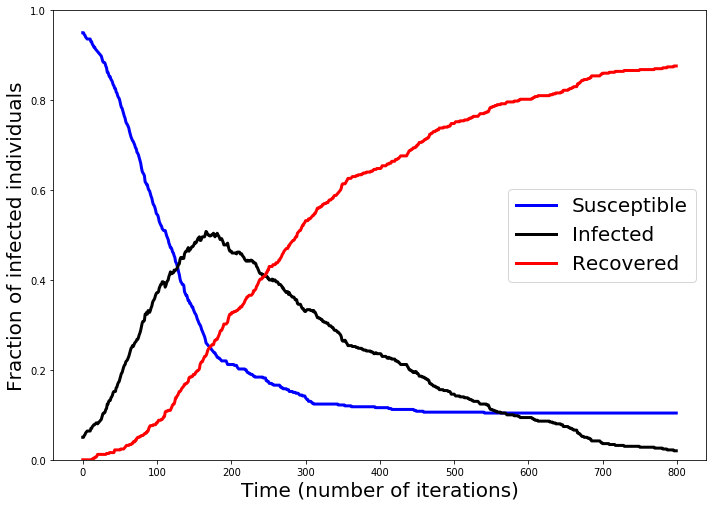

In [147]:
G = nx.erdos_renyi_graph(500,0.008)
curve = get_SIR_infection_curve(G, 0.01,0.005, 800)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.ylim(0,1)
plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

ax.plot(curve[0],curve[3], label = 'Susceptible', color='blue', linewidth = 3)
ax.plot(curve[0],curve[1], label = 'Infected', color = 'black', linewidth = 3)
ax.plot(curve[0],curve[2], label = 'Recovered', color = 'red', linewidth = 3)

plt.legend(loc = 'center right', fontsize=20)

## Reducing transmission rate (encouraging handwashing etc)

Let us explore the effect of reducing the transmission rate between individuals.

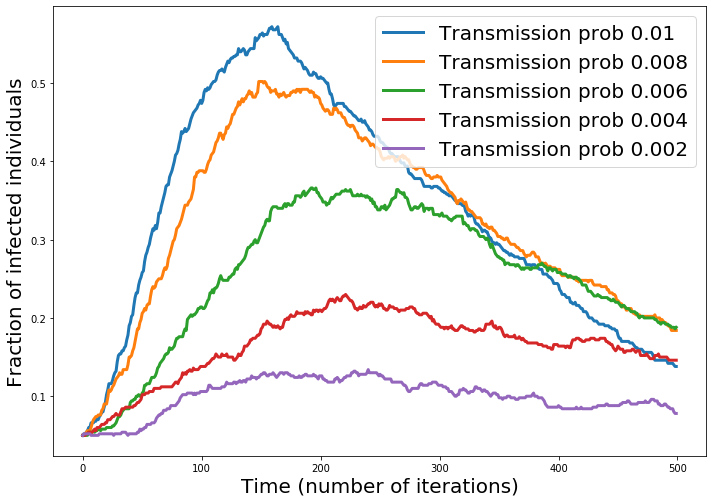

In [17]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

betas = [0.01, 0.008, 0.006, 0.004, 0.002]

for i in range(5):
    curve = get_infection_curve(G, betas[i],0.005, 500)
    ax.plot(curve[0],curve[1], label = 'Transmission prob '+str(betas[i]), linewidth = 3)

plt.legend(loc = 'upper right', fontsize=20)
plt.show()

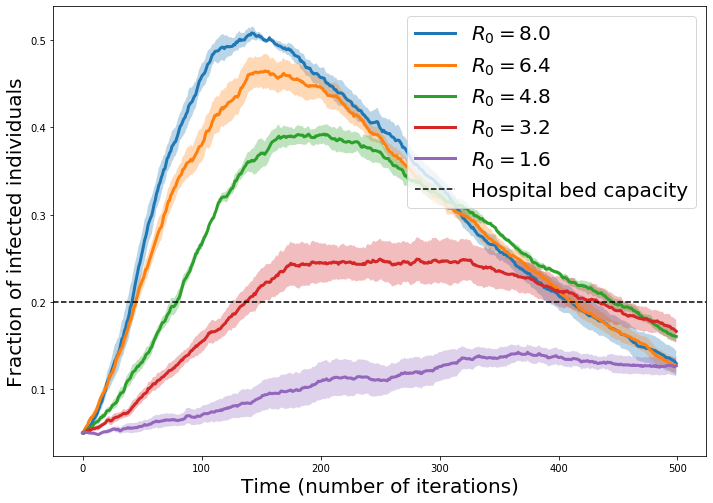

In [133]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

G = nx.barabasi_albert_graph(500,2)

betas = [0.01, 0.008, 0.006, 0.004, 0.002]
no_experiments = 5

for i in range(5):
    experiments = np.zeros((no_experiments,500),dtype=float)
    for ex in range(no_experiments):
        curve = get_infection_curve(G, betas[i],0.005, 500)
        experiments[ex]=curve[1]
    avg = np.mean(experiments,axis=0)
    std = np.std(experiments,axis=0)
    ax.plot(curve[0],avg, label = '$R_0=$'+str(betas[i]*4/0.005), linewidth = 3)
    ax.fill_between(curve[0],avg-0.5*std, avg + 0.5*std, alpha = 0.3)

plt.axhline(y=0.2,label='Hospital bed capacity',color='black',linestyle='--')
    
plt.legend(loc = 'upper right', fontsize=20)
plt.show()

# Node removal (vaccinating or quarantining members of the population)

In this scenario we remove the highest x% degree nodes from the network. In a network where the nodes are airports and edges are flights, this might be the equivalent of stopping flights to and from a particular airport.

[]
996
[ 7  2 10  6  9]
809
[ 7  2 10  6  9  0  3 11 25 67]
730
[ 7  2 10  6  9  0  3 11 25 67 30 12 28 16 92]
667
[ 7  2 10  6  9  0  3 11 25 67 30 12 28 16 92  1 18 20 36  4]
614


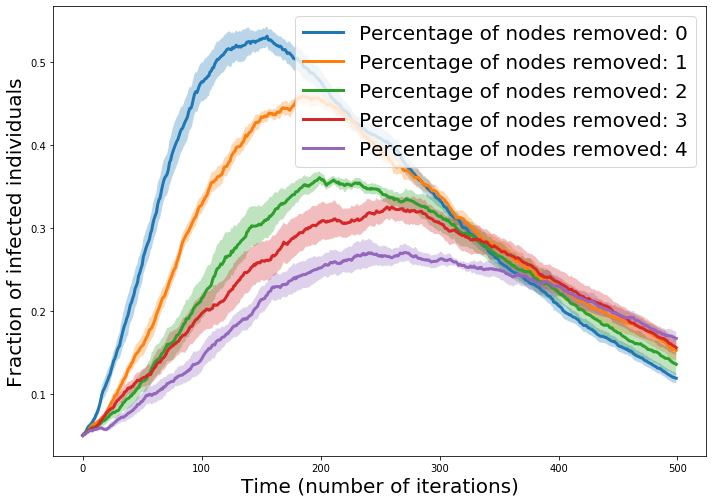

In [35]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

perc = [0,1,2,3,4]
no_experiments = 5

ranks = np.argsort([-1*G.degree(n) for n in G.nodes()])

for i in range(5):
    H = G.copy()
    number = round(float(perc[i])*G.number_of_nodes()/100)
    top_nodes = ranks[:number]
    for n in top_nodes:
        H.remove_edges_from([(n,out) for out in G.neighbors(n)])
    experiments = np.zeros((no_experiments,500),dtype=float)
    for ex in range(no_experiments):
        curve = get_infection_curve(H, 0.01,0.005, 500)
        experiments[ex]=curve[1]
    avg = np.mean(experiments,axis=0)
    std = np.std(experiments,axis=0)
    ax.plot(curve[0],avg, label = 'Percentage of nodes removed: '+str(perc[i]), linewidth = 3)
    ax.fill_between(curve[0],avg-0.5*std, avg + 0.5*std, alpha = 0.3)
    
plt.legend(loc = 'upper right', fontsize=20)
plt.show()

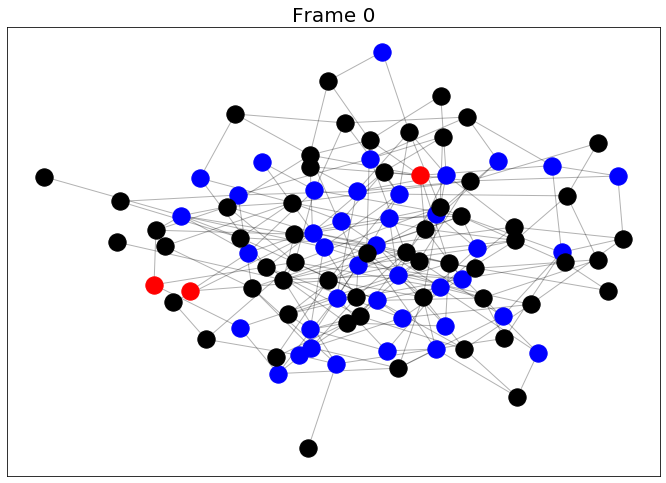

In [132]:
from matplotlib.animation import FuncAnimation
from random import sample
from collections import defaultdict
from IPython.display import HTML

a4_dims = (11.7, 8.27)
fig = plt.figure(figsize = a4_dims)
ax = fig.add_subplot(1,1,1)

plt.axis('off')

vaccinated_proportion = 0.4

G = nx.erdos_renyi_graph(100, 0.05)

pos = nx.spring_layout(G)

R0 = 1.5/5

no_nodes = G.number_of_nodes()
immune = sample(G.nodes(), round(vaccinated_proportion*no_nodes))

node_colours=defaultdict(lambda: 'black')

H = G.copy()

for node in immune:
    H.remove_edges_from([(node,out) for out in G.neighbors(node)])
    node_colours[node]='gray'

model = ep.SISModel(H)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.05*R0)
cfg.add_model_parameter('lambda', 0.05)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

iterations = model.iteration_bunch(50)
infected = defaultdict(lambda: False)

def update(i):
    ax.clear()
    for node in iterations[i]['status'].keys():
        if node in immune:
            continue
        if iterations[i]['status'][node]==0:
            infected[node]=False
        else:
            infected[node]=True
    nx.draw_networkx_nodes(G, ax=ax, nodelist = immune, pos=pos, node_color='blue')
    nx.draw_networkx_nodes(G, ax=ax, nodelist = [nd for nd in G.nodes() if infected[nd] and nd not in immune], 
                           pos=pos, node_color='red')
    nx.draw_networkx_nodes(G, ax=ax, nodelist = [nd for nd in G.nodes() if not infected[nd] and nd not in immune], 
                           pos=pos, node_color='black')
    nx.draw_networkx_edges(G, ax=ax, pos=pos, alpha = 0.3)
    ax.set_title("Frame "+str(i), fontsize=20)

ani = FuncAnimation(fig, update, frames=50, interval=100)

HTML(ani.to_jshtml())